##Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:



In [1]:
# General DS Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Decision Tree and Model Evaluation Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

In [2]:
# Acquire Step
df = acquire.get_titanic_data()


In [3]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
train, validate, test = prepare.prep_titanic_data(df)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0


In [5]:
# Preprocessing for modeling
X_train_titanic = train.drop(columns=['survived', 'sex', 'embark_town'])
y_train_titanic = train.survived

X_validate_titanic = validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate_titanic = validate.survived

X_test_titanic = test.drop(columns=['survived', 'sex', 'embark_town'])
y_test_titanic = test.survived


In [6]:
X_train_titanic.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,36.000000,0,0,40.1250,1,1,0,0
165,3,9.000000,0,2,20.5250,0,1,0,1
50,3,7.000000,4,1,39.6875,0,1,0,1
259,2,50.000000,0,1,26.0000,0,0,0,1
306,1,29.678105,0,0,110.8833,1,0,0,0


In [7]:
y_train_titanic[:5]


583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: int64

In [8]:
X_train_titanic.shape, X_validate_titanic.shape, X_test_titanic.shape

((498, 9), (214, 9), (179, 9))

In [9]:
y_train_titanic.shape, y_validate_titanic.shape, y_test_titanic.shape

((498,), (214,), (179,))

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [10]:
y_train_titanic[0:10]


583    0
165    1
50     0
259    1
306    1
308    0
314    0
883    0
459    0
180    0
Name: survived, dtype: int64

In [11]:
y_train_titanic.value_counts()


0    307
1    191
Name: survived, dtype: int64

In [12]:
# The mode is a great baseline
baseline_titanic = y_train_titanic.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train_titanic == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [13]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree1.fit(X_train_titanic, y_train_titanic)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions_titanic = tree1.predict(X_train_titanic)

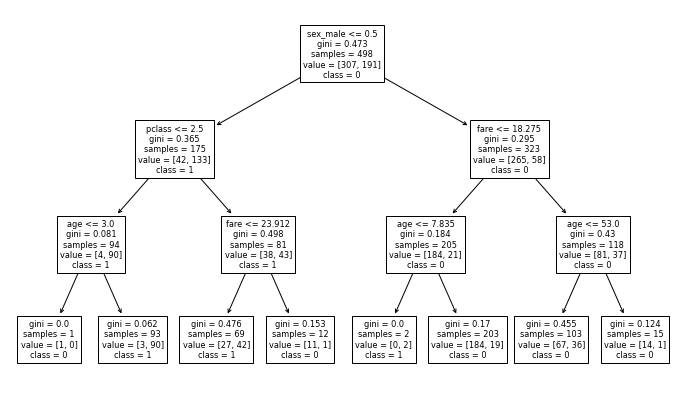

In [14]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train_titanic.columns, class_names=['0','1'])
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train_titanic, y_train_titanic)))

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train_titanic, y_train_titanic)))

In [ ]:
plot_confusion_matrix(tree1, X_train_titanic, y_train_titanic)


In [ ]:
print(classification_report(y_train_titanic, y_predictions_titanic))


In [ ]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train_titanic, y_predictions_titanic, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train_titanic, y_predictions_titanic).ravel()


The label of positive and negative is arbitrary. What is sklearn considering to be the positive case here?

In [ ]:
TN, FP, FN, TP


In [ ]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train_titanic.value_counts())

Sklearn is calling survival (1) our positive case



In [ ]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")


### 5. Run through steps 2-4 using a different max_depth value.



In [ ]:
# Let's get loopy
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train_titanic, y_train_titanic)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train_titanic)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train_titanic, y_predictions_titanic, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

### 6. Which model performs better on your in-sample data?



In [ ]:
# Max depth of 15+ produces the highest accuracy


### 7. Which model performs best on your out-of-sample data, the validate set?



In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train_titanic, y_train_titanic)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train_titanic, y_train_titanic)
    
    out_of_sample_accuracy = tree.score(X_validate_titanic, y_validate_titanic)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
titanic = pd.DataFrame(metrics)
titanic["difference"] = titanic.train_accuracy - titanic.validate_accuracy
titanic


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(titanic.max_depth, titanic.train_accuracy, marker = 'o', label = 'Train')
plt.plot(titanic.max_depth, titanic.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
titanic[titanic.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


### 8. Work through these same exercises using the Telco dataset.


In [ ]:
# Acquire Step
telco = acquire.get_telco_data()

In [ ]:
telco.head()

In [ ]:
telco.columns

In [ ]:
train, validate, test = prepare.prep_telco_data(telco)
train.head()

In [ ]:
# Preprocessing for modeling

#functions can't take strings so i dropped all columns that are strings
drop_columns = list(train.select_dtypes(include='object').columns) + ['churn_encoded']

X_train_telco = train.drop(columns=drop_columns)
y_train_telco = train.churn_encoded

X_validate_telco = validate.drop(columns=drop_columns)
y_validate_telco = validate.churn_encoded

X_test_telco = test.drop(columns=drop_columns)
y_test_telco = test.churn_encoded


In [ ]:
y_train_telco

In [ ]:
X_train_telco.columns.tolist()

In [ ]:
X_train_telco.head()

In [ ]:
X_train_telco.shape, X_validate_telco.shape, X_test_telco.shape

In [ ]:
y_train_telco.shape, y_validate_telco.shape, y_test_telco.shape


In [ ]:
y_train_telco[0:10]

In [ ]:
y_train_telco.value_counts()

In [ ]:
# The mode is a great baseline
baseline = y_train_telco.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train_telco == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

In [ ]:
# Make the model
tree2 = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree2.fit(X_train_telco, y_train_telco)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions_telco = tree2.predict(X_train_telco)

In [ ]:
plt.figure(figsize=(12, 7))
plot_tree(tree2, feature_names=X_train_telco.columns, class_names=['0','1'])
plt.show()

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree2.score(X_train_telco, y_train_telco)))

In [ ]:
plot_confusion_matrix(tree2, X_train_telco, y_train_telco)

In [ ]:
print(classification_report(y_train_telco, y_predictions_telco))

In [ ]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train_telco, y_predictions_telco, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)


### Question 4: Just for Fun - Calculate Metrics
Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train_telco, y_predictions_telco).ravel()


The label of positive and negative is arbitrary. What is sklearn considering to be the positive case here?



In [ ]:
TN, FP, FN, TP



In [ ]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train_telco.value_counts())

In [ ]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

In [ ]:
# Let's get loopy
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train_telco, y_train_telco)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions_telco = tree.predict(X_train_telco)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train_telco, y_predictions_telco, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Max depth of 19

In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train_telco, y_train_telco)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train_telco, y_train_telco)
    
    out_of_sample_accuracy = tree.score(X_validate_telco, y_validate_telco)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
telco = pd.DataFrame(metrics)
telco["difference"] = telco.train_accuracy - telco.validate_accuracy
telco

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(telco.max_depth, telco.train_accuracy, marker = 'o', label = 'Train')
plt.plot(telco.max_depth, telco.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
telco[telco.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


### Continue working in your model file with titanic data to do the following:



In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [ ]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,                  
                            max_depth=10, 
                            random_state=123)


In [ ]:
rf.fit(X_train_titanic, y_train_titanic)

In [ ]:
print(rf.feature_importances_)

In [ ]:
y_pred_titanic = rf.predict(X_train_titanic)

In [ ]:
y_pred_proba_titanic = rf.predict_proba(X_train_titanic)

### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [ ]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train_titanic, y_train_titanic)))

In [ ]:
print(confusion_matrix(y_train_titanic, y_pred_titanic))

In [ ]:
print(classification_report(y_train_titanic, y_pred_titanic))

### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train_titanic, y_predictions_titanic).ravel()

ALL = TP + FP + FN + TN

TP, TN, FP, FN, ALL

In [ ]:
accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [ ]:
y_train_df = pd.DataFrame(y_train_titanic)

In [ ]:
model_prediction = y_train_df.copy()

# Let's get loopy
# Make the model
for i in range(1, 6):
    for j in range(10, 5, -1):
        rf = RandomForestClassifier(
            min_samples_leaf=i, 
            max_depth=j, 
            random_state=123
        )
        rf.fit(X_train_titanic, y_train_titanic)
        
        curr_preds = rf.predict(X_train_titanic)
        
        model_prediction[f'msl_{i}_md_{j}'] = curr_preds
    

In [ ]:
model_prediction

In [ ]:
model_prediction.head()

### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [ ]:
actuals = model_prediction.survived
preds = model_prediction.drop(columns = 'survived')

for column in preds.columns:
    
    accuracy = (actuals == preds[column]).mean()
    
    print(f'{column} accuracy: {accuracy}')

# KNN
### Continue working in your model file with the titanic dataset.

In [ ]:
import acquire
import prepare

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Data acquisition
from pydataset import data



In [ ]:
# Acquire Step
df = acquire.get_titanic_data()
#df = df.drop(columns='passenger_id')

In [ ]:
df.head()

In [ ]:
train, validate, test = prepare.prep_titanic_data(df)
train.head()

In [ ]:
train.shape

In [ ]:
# Preprocessing for modeling
X_train_titanic = train.drop(columns=['survived', 'sex', 'embark_town'])
y_train_titanic = train.survived

X_validate_titanic = validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate_titanic = validate.survived

X_test_titanic = test.drop(columns=['survived', 'sex', 'embark_town'])
y_test_titanic = test.survived


#### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)


In [ ]:
knn_titanic = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [ ]:
knn_titanic.fit(X_train_titanic, y_train_titanic)

In [ ]:
y_pred_titanic = knn_titanic.predict(X_train_titanic)

In [ ]:
y_pred_titanic

In [ ]:
y_pred_proba_titanic = knn_titanic.predict_proba(X_train_titanic)

In [ ]:
y_pred_proba_titanic


#### 2. Evaluate your results using the model score, confusion matrix, and classification report.



In [ ]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn_titanic.score(X_train_titanic, y_train_titanic)))

In [ ]:
print(confusion_matrix(y_train_titanic, y_pred_titanic))

In [ ]:
print(classification_report(y_train_titanic, y_pred_titanic))

#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train_titanic, y_pred_titanic).ravel()
ALL = TP + FP + FN + TN

TP, TN, FP, FN, ALL

In [ ]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

#### 4. Run through steps 1-3 setting k to 10



#### 1. CREATE & FIT

In [ ]:
knn_titanic2 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [ ]:
knn_titanic2.fit(X_train_titanic, y_train_titanic)

In [ ]:
y_pred_titanic = knn_titanic2.predict(X_train_titanic)

In [ ]:
y_pred_proba_titanic = knn_titanic2.predict_proba(X_train_titanic)


#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [ ]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn_titanic2.score(X_train_titanic, y_train_titanic)))

In [ ]:
print(confusion_matrix(y_train_titanic, y_pred_titanic))

In [ ]:
print(classification_report(y_train_titanic, y_pred_titanic))

#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train_titanic, y_pred_titanic).ravel()
ALL = TP + FP + FN + TN

TP, TN, FP, FN, ALL

In [ ]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

#### 5. Run through steps 1-3 setting k to 20



### CREATE & FIT

In [ ]:
knn_titanic3 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [ ]:
knn_titanic3.fit(X_train_titanic, y_train_titanic)

In [ ]:
y_pred_titanic = knn_titanic3.predict(X_train_titanic)

In [ ]:
y_pred_proba_titanic = knn_titanic3.predict_proba(X_train_titanic)

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [ ]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn_titanic3.score(X_train_titanic, y_train_titanic)))

In [ ]:
print(confusion_matrix(y_train_titanic, y_pred_titanic))

In [ ]:
print(classification_report(y_train_titanic, y_pred_titanic))

#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train_titanic, y_pred_titanic).ravel()
ALL = TP + FP + FN + TN

TP, TN, FP, FN, ALL

In [ ]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

#### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



K5 = Accuracy of KNN classifier on training set: 0.80

K10 = Accuracy of KNN classifier on training set: 0.74


K20 = Accuracy of KNN classifier on training set: 0.72

K5 performs better.

#### 7. Which model performs best on our out-of-sample data from validate?

K5 = Accuracy: 0.7951807228915663

K10 = Accuracy: 0.7449799196787149


K20 = Accuracy: 0.7188755020080321


K5's accuracy was higher that 10 and 20.

# Logistical Regression
In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.  For all of the models you create, choose a threshold that optimizes for accuracy.

Do your work for these exercises in either a notebook or a python script named model within your classification-exercises repository. Add, commit, and push your work.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import prepare
import acquire



In [2]:
titanic = acquire.get_titanic_data()

In [3]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


### 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [4]:
sex_df = pd.get_dummies(titanic[['sex',]], dummy_na=False, drop_first=[True, True])
sex_df.head()

,sex_male
0,1
1,0
2,0
3,0
4,1


In [5]:
titanic1 = pd.concat([titanic, sex_df], axis=1)
titanic1.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,sex_male
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1,0
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1,1


In [6]:
train, validate, test = prepare.prep_titanic_data(titanic1)

In [7]:
train.shape, validate.shape, test.shape

((498, 13), (214, 13), (179, 13))

In [8]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,1,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,1,0,1
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,1,0,1
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,0,1
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0,0


In [9]:
# Make new dataframes
X_train = train.drop(columns=['survived', 'sex', 'embark_town'])
y_train = train.survived

X_validate = validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate = validate.survived

X_test = test.drop(columns=['survived', 'sex', 'embark_town'])
y_test = test.survived

In [10]:
X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,36.000000,0,0,40.1250,1,1,1,0,0
165,3,9.000000,0,2,20.5250,0,1,1,0,1
50,3,7.000000,4,1,39.6875,0,1,1,0,1
259,2,50.000000,0,1,26.0000,0,0,0,0,1
306,1,29.678105,0,0,110.8833,1,0,0,0,0


# Model 1

### 1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?


In [11]:
# Define the logistic regression model
logit = LogisticRegression(C=1, random_state=123)

In [12]:
#  fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [13]:
# now use the model to make predictions
y_pred = logit.predict(X_train)

In [14]:
#take a look at predictions
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [15]:
# look at predicted probabilites for first 10 observations
logit.predict_proba(X_train)[:10]

array([[0.6035116 , 0.3964884 ],
       [0.8038497 , 0.1961503 ],
       [0.96296676, 0.03703324],
       [0.21620824, 0.78379176],
       [0.0686917 , 0.9313083 ],
       [0.79022407, 0.20977593],
       [0.85980863, 0.14019137],
       [0.76397086, 0.23602914],
       [0.84382449, 0.15617551],
       [0.97187331, 0.02812669]])

In [16]:
logit.classes_

array([0, 1])

In [17]:
# View raw probabilities (output from the model)

y_pred_proba = logit.predict_proba(X_train)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['dead', 'survived'])
y_pred_proba.head().round(3)

,dead,survived
0,0.604,0.396
1,0.804,0.196
2,0.963,0.037
3,0.216,0.784
4,0.069,0.931


In [18]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       307
           1       0.77      0.73      0.75       191

    accuracy                           0.81       498
   macro avg       0.80      0.80      0.80       498
weighted avg       0.81      0.81      0.81       498



# Model 2

### 3. Try out other combinations of features and models.


In [19]:
# Change hyperparameter C = 0.01

logit2 = LogisticRegression(C=.01 ,random_state=123)

In [20]:
# fit the model
logit2.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=123)

In [21]:
# make prediction
y_pred2 = logit2.predict(X_train)

In [22]:
#classification report
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       307
           1       0.84      0.45      0.59       191

    accuracy                           0.76       498
   macro avg       0.79      0.70      0.71       498
weighted avg       0.78      0.76      0.74       498



# Model 3

In [23]:
# Change hyperparameter C = 10

logit3 = LogisticRegression(C=10 ,random_state=123)

In [24]:
# fit the model
logit3.fit(X_train, y_train)

LogisticRegression(C=10, random_state=123)

In [25]:
# make prediction
y_pred3 = logit3.predict(X_train)

In [26]:
#classification report
print(classification_report(y_train, y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       307
           1       0.78      0.73      0.75       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.80       498
weighted avg       0.82      0.82      0.82       498



### 4. Use your best 3 models to predict and evaluate on your validate sample.


In [27]:
# Make prediction for validate dataset

y_pred_validate = logit.predict(X_validate)
y_pred_validate2 = logit2.predict(X_validate)
y_pred_validate3 = logit3.predict(X_validate)

In [28]:
print("Model 1: solver = lbfgs, c = 1")

print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

print(classification_report(y_validate, y_pred_validate))

print('--------------------------------------------------')

print("Model 2: solver = lbfgs, c = .01")

print('Accuracy: {:.2f}'.format(logit2.score(X_validate, y_validate)))

print(classification_report(y_validate, y_pred_validate2))

print('--------------------------------------------------')

print("Model 3: solver = lbfgs, c = 10")

print('Accuracy: {:.2f}'.format(logit3.score(X_validate, y_validate)))

print(classification_report(y_validate, y_pred_validate3))

Model 1: solver = lbfgs, c = 1
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       132
           1       0.73      0.67      0.70        82

    accuracy                           0.78       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.78      0.78      0.78       214

--------------------------------------------------
Model 2: solver = lbfgs, c = .01
Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.74      0.98      0.84       132
           1       0.92      0.44      0.60        82

    accuracy                           0.77       214
   macro avg       0.83      0.71      0.72       214
weighted avg       0.81      0.77      0.75       214

--------------------------------------------------
Model 3: solver = lbfgs, c = 10
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     

In [29]:
# look at model 1 coefficents
 
print('Coefficient: \n', logit.coef_[0])

Coefficient: 
 [-1.27781676e+00 -3.88242068e-02 -5.16720206e-01 -1.61804156e-01
 -1.05641400e-03 -6.38398915e-01 -1.42819396e+00 -1.42819396e+00
  1.00914392e+00  1.81470939e-01]


In [30]:
# look at model 2 coefficents
 
print('Coefficient: \n', logit2.coef_[0])

Coefficient: 
 [-0.27865064 -0.01708698 -0.1407132   0.02205654  0.00721229 -0.09367271
 -0.39987487 -0.39987487  0.03362353 -0.06559861]


In [31]:
# look at model 3 coefficents
 
print('Coefficient: \n', logit3.coef_[0])

Coefficient: 
 [-1.27974769e+00 -3.86987784e-02 -5.59861798e-01 -1.68002039e-01
 -8.28000876e-04 -6.63280599e-01 -1.44930861e+00 -1.44930861e+00
  1.17059379e+00  2.29787999e-01]


In [32]:
# Make a dataframe of coefficients and feature names

log_coeffs = pd.DataFrame(logit.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
log_coeffs

,coeffs
sex_male,-1.428194
sex_male,-1.428194
pclass,-1.277817
alone,-0.638399
sibsp,-0.516720
parch,-0.161804
age,-0.038824
fare,-0.001056
embark_town_Southampton,0.181471
embark_town_Queenstown,1.009144


In [33]:
# Make a dataframe of coefficients and feature names

log_coeffs2 = pd.DataFrame(logit2.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
log_coeffs2

,coeffs
sex_male,-0.399875
sex_male,-0.399875
pclass,-0.278651
sibsp,-0.140713
alone,-0.093673
embark_town_Southampton,-0.065599
age,-0.017087
fare,0.007212
parch,0.022057
embark_town_Queenstown,0.033624


In [34]:
# Make a dataframe of coefficients and feature names

log_coeffs3 = pd.DataFrame(logit3.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
log_coeffs3

,coeffs
sex_male,-1.449309
sex_male,-1.449309
pclass,-1.279748
alone,-0.663281
sibsp,-0.559862
parch,-0.168002
age,-0.038699
fare,-0.000828
embark_town_Southampton,0.229788
embark_town_Queenstown,1.170594


### 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?


Bonus1 How do different strategies for handling the missing values in the age column affect model performance?

Bonus2: How do different strategies for encoding sex affect model performance?

Bonus3: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.
Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.

C = .01, .1, 1, 10, 100, 100

Bonus Bonus: how does scaling the data interact with your choice of C?